# Part II - Effects of Loan Variables on Borrower's APR
## by Ufuoma Ejite

## Investigation Overview

In this investigation, I explored the borrower's APR and the features that could affect it.
The main focus was on the Borrower's APR, Borrower's rate, Lender's yield and Prosper Score.

## Dataset Overview

Basically, the dataset contains the loan information and borrowers' information. 
However, some data points were removed from the analysis due to inconsistencies or missing information.
There are 4 data types in this dataset; datetime, float, integer and object

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv("prosperLoanData.csv")

In [10]:
# a copy of the original data is first made before cleaning
loan_data_clean = loan_data.copy()

In [11]:
# dropping unwanted columns
loan_data_clean.drop(['ListingKey', 'ListingNumber', 'ClosedDate', 'CreditGrade', 'EstimatedEffectiveYield',
                      'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'EmploymentStatusDuration',
                      'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',                       
                      'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine',                
                      'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts',                
                      'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',                        
                      'CurrentDelinquencies', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
                      'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization',
                      'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 
                      'DebtToIncomeRatio', 'IncomeVerifiable', 'TotalProsperLoans',
                      'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
                      'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
                      'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
                      'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationQuarter', 'MemberKey',
                      'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees',
                      'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
                      'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount',
                      'InvestmentFromFriendsAmount'], axis=1, inplace=True)

loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
AmountDelinquent             106315 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
LoanKey                      113937 non-null object
LoanOriginalAmount           113937 non-null int64
Loan

In [12]:
# cleaning missing values
loan_df = loan_data_clean.dropna()
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 20 columns):
ListingCreationDate          83520 non-null object
Term                         83520 non-null int64
LoanStatus                   83520 non-null object
BorrowerAPR                  83520 non-null float64
BorrowerRate                 83520 non-null float64
LenderYield                  83520 non-null float64
ProsperRating (Alpha)        83520 non-null object
ProsperScore                 83520 non-null float64
ListingCategory (numeric)    83520 non-null int64
BorrowerState                83520 non-null object
Occupation                   83520 non-null object
EmploymentStatus             83520 non-null object
AmountDelinquent             83520 non-null float64
IncomeRange                  83520 non-null object
StatedMonthlyIncome          83520 non-null float64
LoanKey                      83520 non-null object
LoanOriginalAmount           83520 non-null int64
LoanOriginationDate 

In [13]:
# changing the datatype of ListingCreationDate and LoanOriginationDate to datetime
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate']) 
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 20 columns):
ListingCreationDate          83520 non-null datetime64[ns]
Term                         83520 non-null int64
LoanStatus                   83520 non-null object
BorrowerAPR                  83520 non-null float64
BorrowerRate                 83520 non-null float64
LenderYield                  83520 non-null float64
ProsperRating (Alpha)        83520 non-null object
ProsperScore                 83520 non-null float64
ListingCategory (numeric)    83520 non-null int64
BorrowerState                83520 non-null object
Occupation                   83520 non-null object
EmploymentStatus             83520 non-null object
AmountDelinquent             83520 non-null float64
IncomeRange                  83520 non-null object
StatedMonthlyIncome          83520 non-null float64
LoanKey                      83520 non-null object
LoanOriginalAmount           83520 non-null int64
LoanOriginat

In [14]:
# convert the ProsperRating (Alpha) and IncomeRange into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

In [15]:
# adjusting the nominal categorical variables to a category datatype
loan_df['Occupation'] = loan_df['Occupation'].astype('category')
loan_df['BorrowerState'] = loan_df['BorrowerState'].astype('category')
loan_df['LoanStatus'] = loan_df['LoanStatus'].astype('category')
loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].astype('category')
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype('category')

## Distribution of the Borrower's APR

The visualization of the borrower's APR is somewhat a multimodal distribution. At 35%, there is the highest peak, which indicates that the majority of the loans have an annual percentage rate of 35%. Also, at 20% there is a second peak. 5% had the least APR count. 

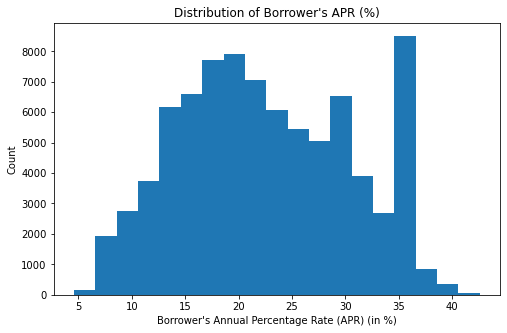

In [16]:
# plotting the distribution of the borrower APR
binsize = 2
borrower_apr = loan_df['BorrowerAPR']*100  #converting it to a percentage format

bins = np.arange(loan_df['BorrowerAPR'].min()*100, loan_df['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.title("Distribution of Borrower's APR (%)")
plt.hist(x = borrower_apr, bins = bins)
plt.xlabel("Borrower's Annual Percentage Rate (APR) (in %)")
plt.ylabel("Count")
plt.show()

## Borrower's APR vs Lender Yield

The relationship between BorrowerAPR and LenderYield is a positive correlation. The higher the borrower's APR, the higher the lender's yield and vice versa

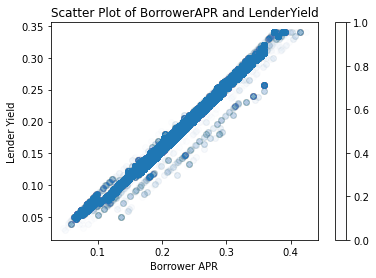

In [17]:
# plotting the relationship between BorrowerAPR and LenderYield
plt.scatter(data = loan_df, x = 'BorrowerAPR', y = 'LenderYield',  alpha =  0.01)
plt.title('Scatter Plot of BorrowerAPR and LenderYield')
plt.xlabel('Borrower APR')
plt.ylabel('Lender Yield');
plt.colorbar();

## Borrower's APR across Lender Yield and Prosper Score

The higher Prosper scores tend to be distributed along the low borrower's APR and lender yield points. That is, the higher the Prosper score, the lower the borrower's APR and lender's yield

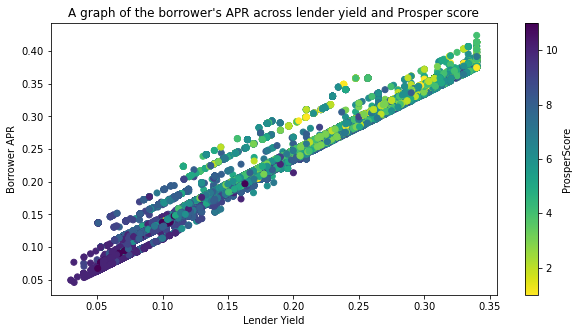

In [18]:
# Plotting a graph of LenderYield vs BorrowerAPR  vs ProsperScore
plt.figure(figsize = [10, 5])
plt.scatter(data=loan_df, x='LenderYield', y = 'BorrowerAPR', c='ProsperScore', cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore')
plt.title("A graph of the borrower's APR across lender yield and Prosper score")
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR');

In [19]:
!jupyter nbconvert Prosper_loan_explanatory_Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_loan_explanatory_Part_II.ipynb to slides
[NbConvertApp] Writing 688104 bytes to Prosper_loan_explanatory_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP PC\anaconda3\envs\tensorflow\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\HP PC\anaconda3\envs\tensorflow\lib\site-packages\nbconvert\n